# Matrix Factorization using Bregman Divergenses

## Testing NMF class

In [47]:
from sklearn.decomposition import NMF as nmfsk
from MatrixFactorization import NMF as nmfmy
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error
from math import sqrt

## 1. Bregman Divergences Graph

### 1.1 Selecting best way to represent Multinomial Distribution with Non- negative Values

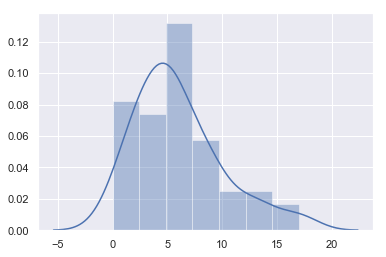

In [50]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.random

rs = RandomState(76321654)

V = rs.multinomial(n = 300, pvals=[1/100]*20 + [1/50] * 20 + [1/25] * 10 , size =200)
sns.set(color_codes=True)
sns.distplot(V[8])

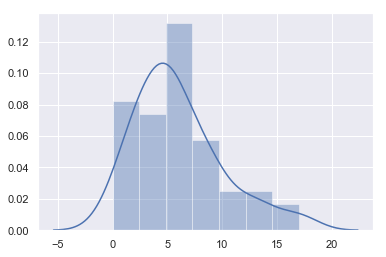

In [51]:
from scipy.stats import multinomial as multinomial
rs = RandomState(76321654)

V = multinomial.rvs(n = 300, p=[1/100]*20 + [1/50] * 20 + [1/25] * 10, random_state=rs, size =200)
sns.set(color_codes=True)
sns.distplot(V[8])

In [54]:
def deriv(f,x):

    h = 0.000000001                 #step-size 
    return (f(x+h) - f(x))/h        #definition of derivative

{'-': <class 'matplotlib.patches.ArrowStyle.Curve'>, '<-': <class 'matplotlib.patches.ArrowStyle.CurveA'>, '->': <class 'matplotlib.patches.ArrowStyle.CurveB'>, '<->': <class 'matplotlib.patches.ArrowStyle.CurveAB'>, '<|-': <class 'matplotlib.patches.ArrowStyle.CurveFilledA'>, '-|>': <class 'matplotlib.patches.ArrowStyle.CurveFilledB'>, '<|-|>': <class 'matplotlib.patches.ArrowStyle.CurveFilledAB'>, ']-[': <class 'matplotlib.patches.ArrowStyle.BracketAB'>, ']-': <class 'matplotlib.patches.ArrowStyle.BracketA'>, '-[': <class 'matplotlib.patches.ArrowStyle.BracketB'>, '|-|': <class 'matplotlib.patches.ArrowStyle.BarAB'>, 'simple': <class 'matplotlib.patches.ArrowStyle.Simple'>, 'fancy': <class 'matplotlib.patches.ArrowStyle.Fancy'>, 'wedge': <class 'matplotlib.patches.ArrowStyle.Wedge'>}
<class 'matplotlib.patches.ArrowStyle.BarAB'>


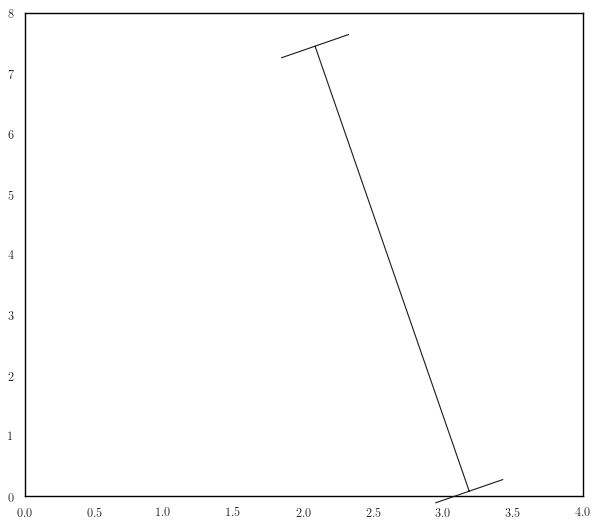

In [367]:
import matplotlib.patches as mpatch

figheight = 8
fig = plt.figure(1, figsize=(9, figheight), dpi=80)
fontsize = 0.4 * fig.dpi

def make_arrowstyles(ax):
    styles = mpatch.ArrowStyle.get_styles()

    ax.set_xlim(0, 4)
    ax.set_ylim(0, figheight)

    for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
        y = (float(len(styles)) -0.25 - i) # /figheight
        p = mpatch.Circle((3.2, y), 0.2, fc="w")
        ax.add_patch(p)

        ax.annotate(stylename, (3.2, y),
                    (2., y),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=fontsize,
                    arrowprops=dict(arrowstyle=stylename,
                                    patchB=p,
                                    shrinkA=5,
                                    shrinkB=5,
                                    fc="w", ec="k",
                                    connectionstyle="arc3,rad=-0.05",
                                    ),
                    bbox=dict(boxstyle="square", fc="w"))
        
ax = fig.add_subplot(111)
y = figheight
styles = mpatch.ArrowStyle.get_styles()
p = mpatch.Circle((3.2, y), 0.2, fc="w")
#ax.add_patch(p)



print(styles)
print(styles['|-|'])
ax.set_xlim(0, 4)
ax.set_ylim(0, figheight)
ax.annotate("", (3.2, 0),
                    (2., figheight),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=fontsize,
                    arrowprops=dict(arrowstyle='|-|',
                                    
                                    shrinkA=5,
                                    shrinkB=5,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    bbox=dict(boxstyle="square", fc="w"))
plt.show()

In [1414]:

        

def tangent_line_gauss(f,x_0,a,b,h):
    
    x = np.linspace(a,b,200)
    y = f(x) 
    y_0 = f(x_0)
    y_tan = deriv(f,x_0) * (x - x_0) + y_0 
   
    #plotting
    fig_1 = plt.figure(figsize=(16, 10))
    ax_1 = fig_1.add_subplot(111)
    
    ax_1.plot(x,y,'red',linewidth = 3)
    ax_1.scatter([h,x_0,h],[f(h),f(x_0),deriv(f,x_0) * (h - x_0) + y_0],linewidths=5, c='black')
    ax_1.plot(x,y_tan,'blue',linewidth = 3)
    #ax_1.axis([a,b,a,b])
    ax_1.set_ylim(deriv(f,x_0) * (0 - x_0) + y_0, np.max(y)+1)
    ax_1.set_xlim(a-0.1,b+0.1)


    ax_1.vlines(x=h, ymin= deriv(f,x_0) * (h - x_0) + y_0 , ymax=f(h), linewidth=3, color='r', linestyle = '--')
    ax_1.vlines(x=h, ymin= 0 , ymax=deriv(f,x_0) * (h - x_0) + y_0 , linewidth=3, color='grey', linestyle = '--')
    ax_1.vlines(x=x_0, ymin= 0 , ymax= f(x_0) , linewidth=3, color='grey', linestyle = '--')

    #ax_1.set_xlabel('x')
    ax_1.text(h-0.1,-2,r'$x$',size =50,weight = 'bold',color='black')
    ax_1.text(x_0-0.1,-2,r'$y$',size =50,weight = 'bold',color='black')

    #ax_1.set_ylabel('phi')
    for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
        ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(30)
    
    plt.axis('off')
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    # DF line
    #plt.annotate('', xy=(1, 12), xycoords='data',
    #    xytext=(1, 8), textcoords='data',
    #    arrowprops={'arrowstyle': '<->'})
    #plt.annotate(
    #    'D = 1', xy=(1, 9), xycoords='data',
    #    xytext=(5, 0), textcoords='offset points')
    #ax_1.annotate ('', xy=(0.4, 0.2), xytext=(0.4, 20), arrowprops={'arrowstyle':'<->','linewidth':10},size=10)

    ax_1.annotate("", (h-0.4, deriv(f,x_0) * (h - x_0) + y_0 - 1) ,
                    (h-0.4, f(h)+1),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=10,
                    arrowprops=dict(arrowstyle='|-|',
                                    
                                    shrinkA=10,
                                    shrinkB=10,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    )
    
    ax_1.annotate('', (h-6, f(h)+5) ,
                    (h-0.2, f(h)-7),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=15,
                    arrowprops=dict(arrowstyle='<-',
                                    
                                    shrinkA=10,
                                    shrinkB=10,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    )
    
    ax_1.text(h-8, f(h)+5,r'$Df(x,y) = \frac{1}{2}(x-y)^2 $',size =50,weight = 'bold',color='black')
    ax_1.text(a+1, f(a)-5,r'$f(z) = \frac{1}{2}z^2 $',size =50,weight = 'bold',color='black')
    ax_1.text(b-1.5, deriv(f,x_0) * (b-1.5 - x_0) + y_0 -2.5 ,r'$h(z)$',size =50,weight = 'bold',color='black')

    ax_1.text(-0.5, -2,'0',size =30,weight = 'bold',color='black')
    ax_1.text(-0.8, np.max(y)-0.5 ,str("%.0f" % round(np.max(y))),size =30,weight = 'bold',color='black')
    ax_1.text(b-0.5, 0.5 ,str(b),size =30,weight = 'bold',color='black')
    ax_1.text(a, 0.5 ,str(a),size =30,weight = 'bold',color='black')

    #ax_1.legend(loc=0, fontsize = 30)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams["font.weight"] = "bold"

    fig_1.tight_layout(pad=0)

    fig_1.savefig('BregmanGraphs/GaussianBregman.pdf')
 

/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:228: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


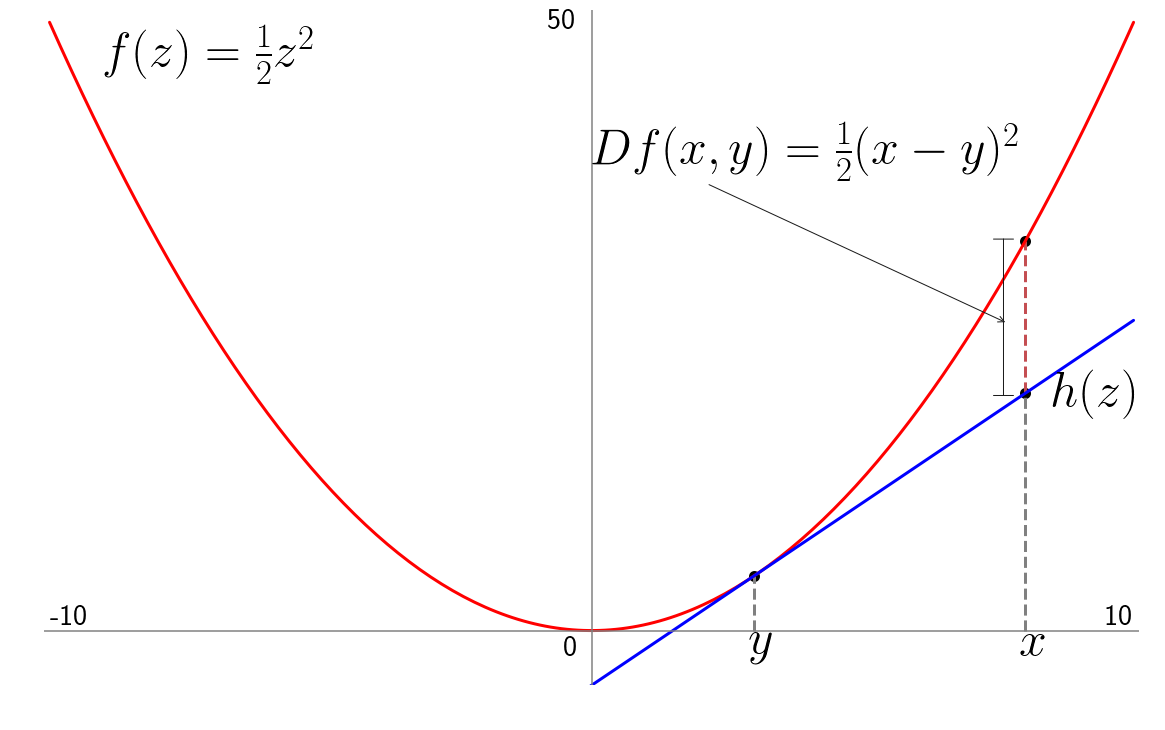

In [1415]:
def f1(x):
    return x **2 / 2

tangent_line_gauss(f1,3,-10,10,8)

In [1412]:
def tangent_line_poiss(f,x_0,a,b,h):
    
    x = np.linspace(a,b,200)
    y = f(x) 
    y_0 = f(x_0)
    y_tan = deriv(f,x_0) * (x - x_0) + y_0 
   
    #plotting
    fig_1 = plt.figure(figsize=(16, 10))
    ax_1 = fig_1.add_subplot(111)
    
    ax_1.plot(x,y,'red',linewidth = 3)
    ax_1.scatter([h,x_0,h],[f(h),f(x_0),deriv(f,x_0) * (h - x_0) + y_0],linewidths=5, c='black')
    ax_1.plot(x,y_tan,'blue',linewidth = 3)
    #ax_1.axis([a,b,a,b])
    ax_1.set_ylim([deriv(f,x_0) * (0 - x_0) + y_0,np.max(y)])
    ax_1.vlines(x=h, ymin= deriv(f,x_0) * (h - x_0) + y_0 , ymax=f(h), linewidth=3, color='r', linestyle = '--')
    ax_1.vlines(x=h, ymin= 0 , ymax=deriv(f,x_0) * (h - x_0) + y_0 , linewidth=3, color='grey', linestyle = '--')
    ax_1.vlines(x=x_0, ymin= 0 , ymax= f(x_0) , linewidth=3, color='grey', linestyle = '--')

    #ax_1.set_xlabel('x')
    plt.text(h-0.1,-2,r'$x$',size =50)
    plt.text(x_0-0.1,-2,r'$y$',size =50)

    #ax_1.set_ylabel('phi')
    for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
        ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(30)
    
    plt.axis('off')
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    # DF line
    #plt.annotate('', xy=(1, 12), xycoords='data',
    #    xytext=(1, 8), textcoords='data',
    #    arrowprops={'arrowstyle': '<->'})
    #plt.annotate(
    #    'D = 1', xy=(1, 9), xycoords='data',
    #    xytext=(5, 0), textcoords='offset points')
    #ax_1.annotate ('', xy=(0.4, 0.2), xytext=(0.4, 20), arrowprops={'arrowstyle':'<->','linewidth':10},size=10)

    ax_1.annotate("", (h-0.4, deriv(f,x_0) * (h - x_0) + y_0 - 1) ,
                    (h-0.4, f(h)+1),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=10,
                    arrowprops=dict(arrowstyle='|-|',
                                    
                                    shrinkA=10,
                                    shrinkB=10,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    )
    
    ax_1.annotate('', (h-9, f(h)) ,
                    (h-0.2, f(h)-3),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=15,
                    arrowprops=dict(arrowstyle='<-',
                                    
                                    shrinkA=10,
                                    shrinkB=10,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    )
    
    plt.text(a, f(h),r'$Df(x,y) = x \log \frac{x}{y} - x + y $',size =50)
    plt.text(b-9.5, f(b)-2,r'$f(z) = \log z - z $',size =50)
    plt.text(b-1, deriv(f,x_0) * (b-1 - x_0) + y_0 -3,r'$h(z)$',size =50)

    ax_1.text(-0.5, 0 ,'0',size =30,weight = 'bold',color='black')
    ax_1.text(-1.3, np.max(y)-0.1 ,str("%.1f" % round(np.max(y),1)),size =30,weight = 'bold',color='black')
    ax_1.text(-1.3,np.min(y_tan) ,str("%.1f" % round(np.min(y_tan),1)),size =30,weight = 'bold',color='black')
    ax_1.text(b, 0.5 ,str(b),size =30,weight = 'bold',color='black')

    
    #ax_1.legend(loc=0, fontsize = 30)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams["font.weight"] = "bold"

    #fig_1.tight_layout()

    fig_1.savefig('BregmanGraphs/PoissonBregman.pdf')


    plt.show()    

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using ps, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


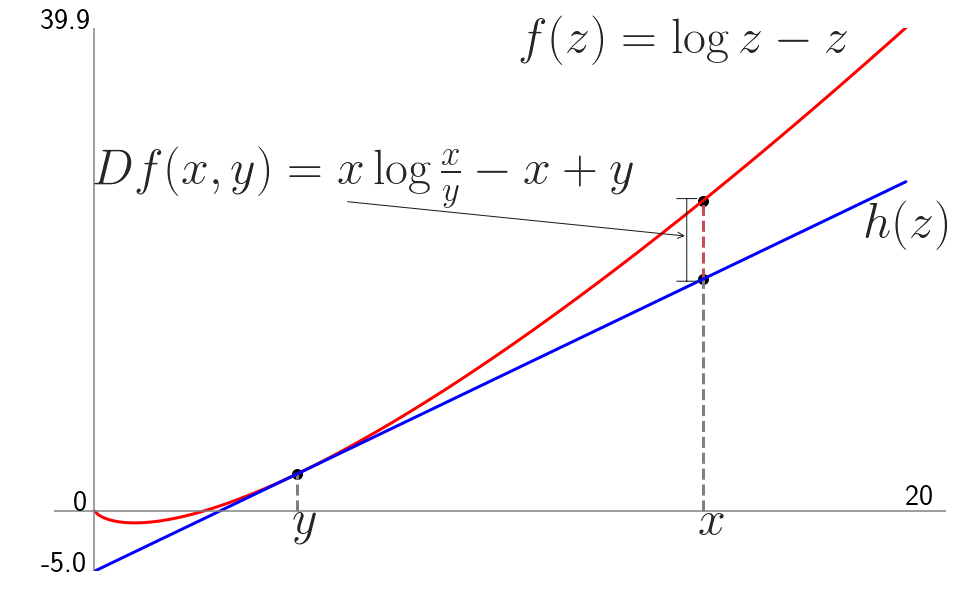

In [1413]:
def f1(x):
    return x * np.log(x) - x

tangent_line_poiss(f1,5,0.00001,20,15)

In [1410]:
def tangent_line_gamma(f,x_0,a,b,h):
    
    x = np.linspace(a,b,200)
    y = f(x) 
    y_0 = f(x_0)
    y_tan = deriv(f,x_0) * (x - x_0) + y_0 
   
    #plotting
    fig_1 = plt.figure(figsize=(16, 10))
    ax_1 = fig_1.add_subplot(111)
    
    ax_1.plot(x,y,'red',linewidth = 3)
    ax_1.scatter([h,x_0,h],[f(h),f(x_0),deriv(f,x_0) * (h - x_0) + y_0],linewidths=5, c='black')
    ax_1.plot(x,y_tan,'blue',linewidth = 3)
    #ax_1.axis([a,b,a,b])
    ax_1.set_ylim([-np.max(y),np.max(y)])
    
    ax_1.vlines(x=h, ymin= deriv(f,x_0) * (h - x_0) + y_0 , ymax=f(h), linewidth=3, color='r', linestyle = '--')
    ax_1.vlines(x=h, ymin=f(h)  , ymax= 0 , linewidth=3, color='grey', linestyle = '--')
    ax_1.vlines(x=x_0, ymin= 0 , ymax= f(x_0) , linewidth=3, color='grey', linestyle = '--')

    #ax_1.set_xlabel('x')
    ax_1.text(h-0.1,0.5,r'$x$',size =50,weight = 'bold',color='black')
    ax_1.text(x_0-0.1,0.5,r'$y$',size =50,weight = 'bold',color='black')

    #ax_1.set_ylabel('phi')
    for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
        ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(30)
    
    plt.axis('off')
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    # DF line
    #plt.annotate('', xy=(1, 12), xycoords='data',
    #    xytext=(1, 8), textcoords='data',
    #    arrowprops={'arrowstyle': '<->'})
    #plt.annotate(
    #    'D = 1', xy=(1, 9), xycoords='data',
    #    xytext=(5, 0), textcoords='offset points')
    #ax_1.annotate ('', xy=(0.4, 0.2), xytext=(0.4, 20), arrowprops={'arrowstyle':'<->','linewidth':10},size=10)

    ax_1.annotate("", (h+0.4, deriv(f,x_0) * (h - x_0) + y_0  -0.5) ,
                    (h+0.4, f(h)+0.5),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=10,
                    arrowprops=dict(arrowstyle='|-|',
                                    
                                    shrinkA=10,
                                    shrinkB=10,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    )
    
    ax_1.annotate('', (h-4, f(h)+6) ,
                    (h+0.5, f(h)-1),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=15,
                    arrowprops=dict(arrowstyle='<-',
                                    
                                    shrinkA=10,
                                    shrinkB=10,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    )
    
    ax_1.text(h-5, f(h)+6,r'$Df(x,y) = \frac{x}{y} - \log\frac{x}{y} - 1 $',size =50,weight = 'bold',color='black')
    ax_1.text(a+1, f(a)-2,r'$f(z) = - \log z $',size =50,weight = 'bold',color='black')
    ax_1.text(h+1.8, deriv(f,x_0) * (h+1.8 - x_0) + y_0 -2 ,r'$h(z)$',size =50,weight = 'bold',color='black')

    ax_1.text(-0.5, 0 ,'0',size =30,weight = 'bold',color='black')
    ax_1.text(-1.3, np.max(y)-0.1 ,str("%.1f" % round(np.max(y),1)),size =30,weight = 'bold',color='black')
    ax_1.text(-1.3,np.min(y_tan) ,str("%.1f" % round(np.min(y_tan),1)),size =30,weight = 'bold',color='black')
    ax_1.text(b, 0.5 ,str(b),size =30,weight = 'bold',color='black')


    
    #ax_1.legend(loc=0, fontsize = 30)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams["font.weight"] = "bold"

    fig_1.tight_layout(pad=0)

    fig_1.savefig('BregmanGraphs/GammaBregman.pdf')



/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:228: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


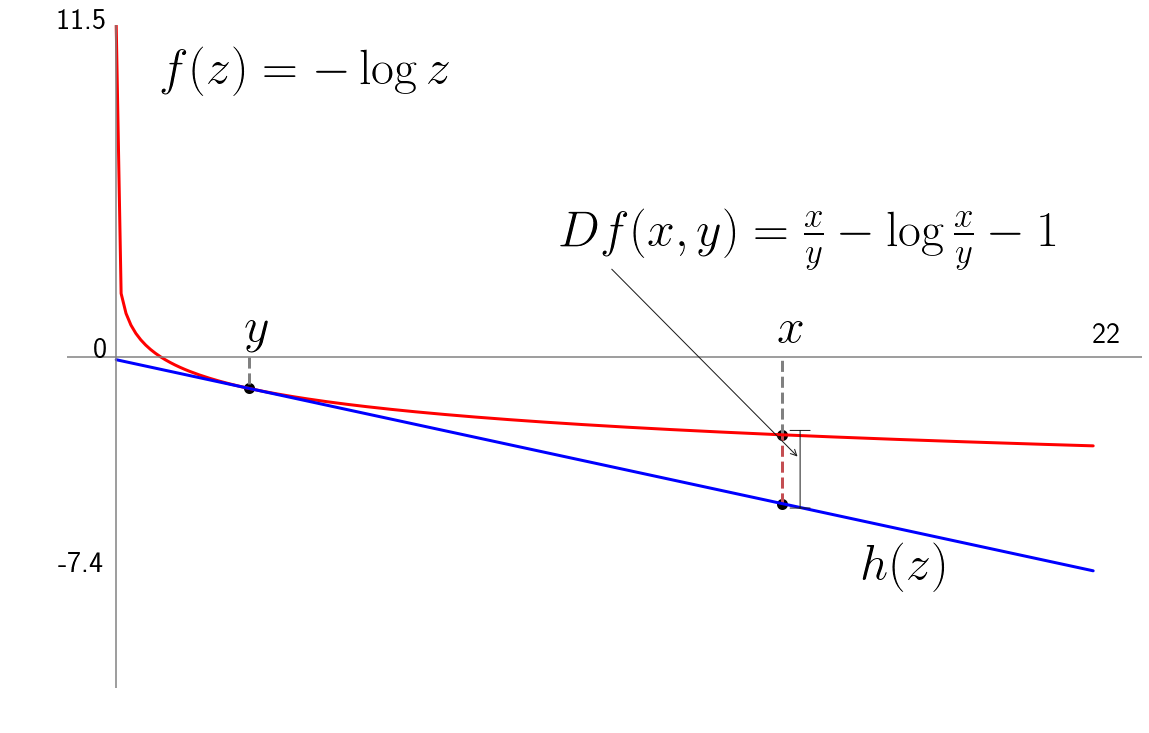

In [1411]:
def f1(x):
    return - np.log(x)

tangent_line_gamma(f1,3,0.00001,22,15)

In [1406]:
def tangent_line_bernoulli(f,x_0,a,b,h):
    
    x = np.linspace(a,b,200)
    y = f(x) 
    y_0 = f(x_0)
    y_tan = deriv(f,x_0) * (x - x_0) + y_0 
   
    #plotting
    fig_1 = plt.figure(figsize=(16, 10))
    ax_1 = fig_1.add_subplot(111)
    
    ax_1.plot(x,y,'red',linewidth = 3)
    ax_1.scatter([h,x_0,h],[f(h),f(x_0),deriv(f,x_0) * (h - x_0) + y_0],linewidths=5, c='black')
    ax_1.plot(x,y_tan,'blue',linewidth = 3)
    #ax_1.axis([a,b,a,b])
    ax_1.set_ylim([np.min(y_tan),0.2])
    ax_1.vlines(x=h, ymin= deriv(f,x_0) * (h - x_0) + y_0 , ymax=f(h), linewidth=3, color='r', linestyle = '--')
    ax_1.vlines(x=h, ymin= f(h) , ymax= 0, linewidth=3, color='grey', linestyle = '--')
    ax_1.vlines(x=x_0, ymin= 0 , ymax= f(x_0) , linewidth=3, color='grey', linestyle = '--')

    #ax_1.set_xlabel('x')
    ax_1.text(h,0.05,r'$x$',size =50,weight = 'bold',color='black')
    ax_1.text(x_0,0.05,r'$y$',size =50,weight = 'bold',color='black')

    #ax_1.set_ylabel('phi')
    for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
        ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(30)
    
    plt.axis('off')
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    # DF line
    #plt.annotate('', xy=(1, 12), xycoords='data',
    #    xytext=(1, 8), textcoords='data',
    #    arrowprops={'arrowstyle': '<->'})
    #plt.annotate(
    #    'D = 1', xy=(1, 9), xycoords='data',
    #    xytext=(5, 0), textcoords='offset points')
    #ax_1.annotate ('', xy=(0.4, 0.2), xytext=(0.4, 20), arrowprops={'arrowstyle':'<->','linewidth':10},size=10)
    
    ax_1.annotate("", (h-0.02, deriv(f,x_0) * (h - x_0) + y_0 -0.03) ,
                    (h-0.02, f(h)+0.026),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=10,
                    arrowprops=dict(arrowstyle='|-|',
                                    
                                    shrinkA=10,
                                    shrinkB=10,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    )
    
    ax_1.annotate('', (h-0.4, f(h)-0.3) ,
                    (h-0.02, f(h)-0.2),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=15,
                    arrowprops=dict(arrowstyle='<-',
                                    
                                    shrinkA=10,
                                    shrinkB=10,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    )
    
    ax_1.text(a, f(h)-0.40,r'$Df(x,y) = x \log \frac{x}{y}  + (1-x) \log \frac{1-x}{1-y} $',size =50,weight = 'bold',color='black')
    ax_1.text(a, 0.15,r'$f(z) = z \log z + (1-z) \log(1-z) $',size =50, weight = 'bold',color='black')
    ax_1.text(0.9, deriv(f,x_0) * (0.9 - x_0) + y_0 +0.05 ,r'$h(z)$',size =50, weight = 'bold',color='black')
    
    ax_1.text(-0.020, 0 ,'0',size =30,weight = 'bold',color='black')
    ax_1.text(-0.04, 0.2 ,'0.2',size =30,weight = 'bold',color='black')
    ax_1.text(-0.06,np.min(y) ,str("%.1f" % round(np.min(y),1)),size =30,weight = 'bold',color='black')
    ax_1.text(-0.06,np.min(y_tan) ,str("%.1f" % round(np.min(y_tan),1)),size =30,weight = 'bold',color='black')

    ax_1.text(1.01,0 ,"1",size =30,weight = 'bold',color='black')


    
    
    #ax_1.legend(loc=0, fontsize = 30)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['axes.edgecolor'] = 'white'
    #plt.rcParams["font.weight"] = "bold"

    fig_1.tight_layout(pad=0)

    fig_1.savefig('BregmanGraphs/BernoulliBregman.pdf')



/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:228: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


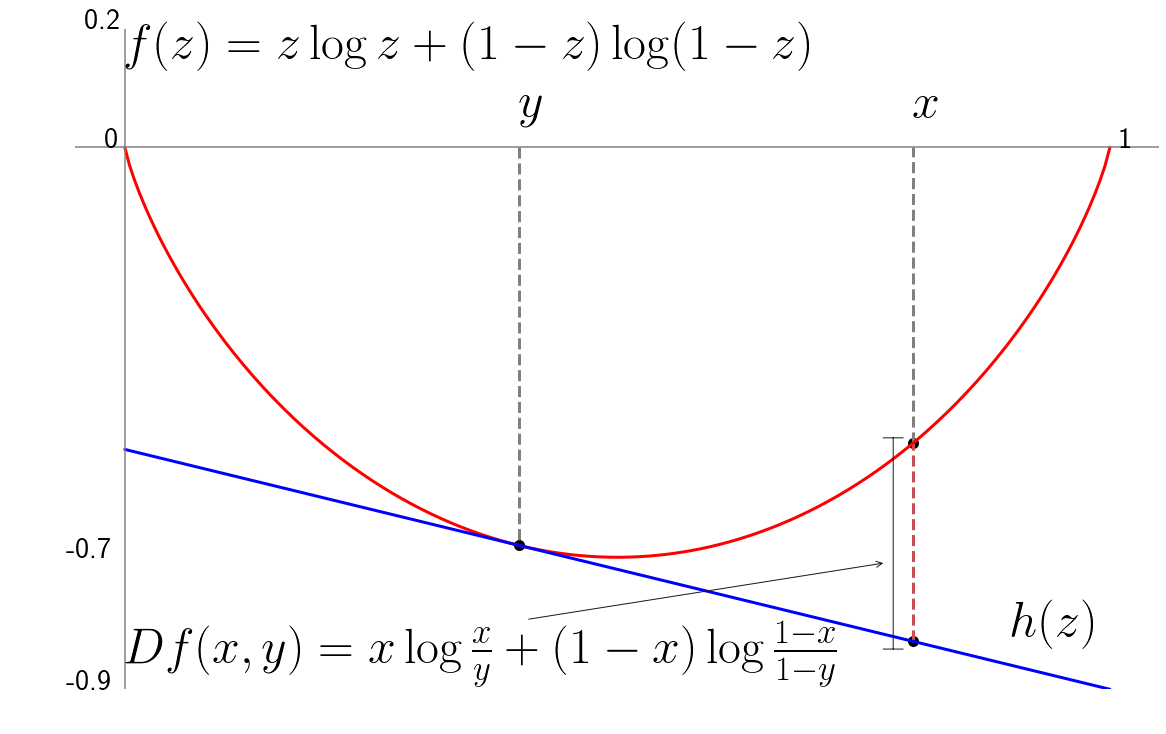

In [1407]:
def f1(x):
    return x * np.log(x)   + (1-x) * np.log((1-x) )

tangent_line_bernoulli(f1,0.4,0.00001,1-0.00001,0.8)

In [1408]:
def tangent_line_binomial(f,x_0,a,b,h):
    
    x = np.linspace(a,b,200)
    y = f(x) 
    y_0 = f(x_0)
    y_tan = deriv(f,x_0) * (x - x_0) + y_0 
   
    #plotting
    fig_1 = plt.figure(figsize=(16, 10))
    ax_1 = fig_1.add_subplot(111)
    
    ax_1.plot(x,y,'red',linewidth = 3)
    ax_1.scatter([h,x_0,h],[f(h),f(x_0),deriv(f,x_0) * (h - x_0) + y_0],linewidths=5, c='black')
    ax_1.plot(x,y_tan,'blue',linewidth = 3)
    #ax_1.axis([a,b,a,b])
    ax_1.set_ylim([np.min(y_tan)-0.2,2])
    ax_1.vlines(x=h, ymin= deriv(f,x_0) * (h - x_0) + y_0 , ymax=f(h), linewidth=3, color='r', linestyle = '--')
    ax_1.vlines(x=h, ymin= f(h) , ymax=0 , linewidth=3, color='grey', linestyle = '--')
    ax_1.vlines(x=x_0, ymin= 0 , ymax= f(x_0) , linewidth=3, color='grey', linestyle = '--')

    #ax_1.set_xlabel('x')
    ax_1.text(h,0.21,r'$x$',size =50,weight = 'bold',color='black')
    ax_1.text(x_0,0.21,r'$y$',size =50,weight = 'bold',color='black')

    #ax_1.set_ylabel('phi')
    for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
        ax_1.get_xticklabels() + ax_1.get_yticklabels()):
        item.set_fontsize(30)
    
    plt.axis('off')
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    # DF line
    #plt.annotate('', xy=(1, 12), xycoords='data',
    #    xytext=(1, 8), textcoords='data',
    #    arrowprops={'arrowstyle': '<->'})
    #plt.annotate(
    #    'D = 1', xy=(1, 9), xycoords='data',
    #    xytext=(5, 0), textcoords='offset points')
    #ax_1.annotate ('', xy=(0.4, 0.2), xytext=(0.4, 20), arrowprops={'arrowstyle':'<->','linewidth':10},size=10)
    
    ax_1.annotate("", (h-0.2, deriv(f,x_0) * (h - x_0) + y_0 -0.2) ,
                    (h-0.2, f(h)+0.2),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=10,
                    arrowprops=dict(arrowstyle='|-|',
                                    
                                    shrinkA=10,
                                    shrinkB=10,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    )
    
    ax_1.annotate('', (h-3, f(h)-3) ,
                    (h-0.2, f(h)-1),
                    #xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=15,
                    arrowprops=dict(arrowstyle='<-',
                                    
                                    shrinkA=10,
                                    shrinkB=10,
                                    fc="w", ec="k",
                                    connectionstyle="arc3",
                                    ),
                    )
    
    ax_1.text(a, f(h)-4.2,r'$Df(x,y) = x \log \frac{x}{y}  + (N-x) \log \frac{N-x}{N-y} $',size =50,weight = 'bold',color='black')
    ax_1.text(a+0.1, f(a)+1,r'$f(z) = z \log \frac{z}{N} + (N-z) \log \frac{N-z}{N} $',size =50,weight = 'bold',color='black')
    ax_1.text(9, deriv(f,x_0) * (9 - x_0) + y_0 +0.4 ,r'$h(z)$',size =50,weight = 'bold',color='black')


    ax_1.text(-0.2, 0 ,'0',size =30,weight = 'bold',color='black')
    ax_1.text(-0.2, 2 ,'2',size =30,weight = 'bold',color='black')
    ax_1.text(-0.5,np.min(y) ,str("%.1f" % round(np.min(y),1)),size =30,weight = 'bold',color='black')
    ax_1.text(-0.5,np.min(y_tan) ,str("%.1f" % round(np.min(y_tan),1)),size =30,weight = 'bold',color='black')
    ax_1.text(10,0 ,"10",size =30,weight = 'bold',color='black')
    
    #ax_1.legend(loc=0, fontsize = 30)
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams["font.weight"] = "bold"

    fig_1.tight_layout(pad=0)

    fig_1.savefig('BregmanGraphs/BinomialBregman.pdf')

/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:228: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


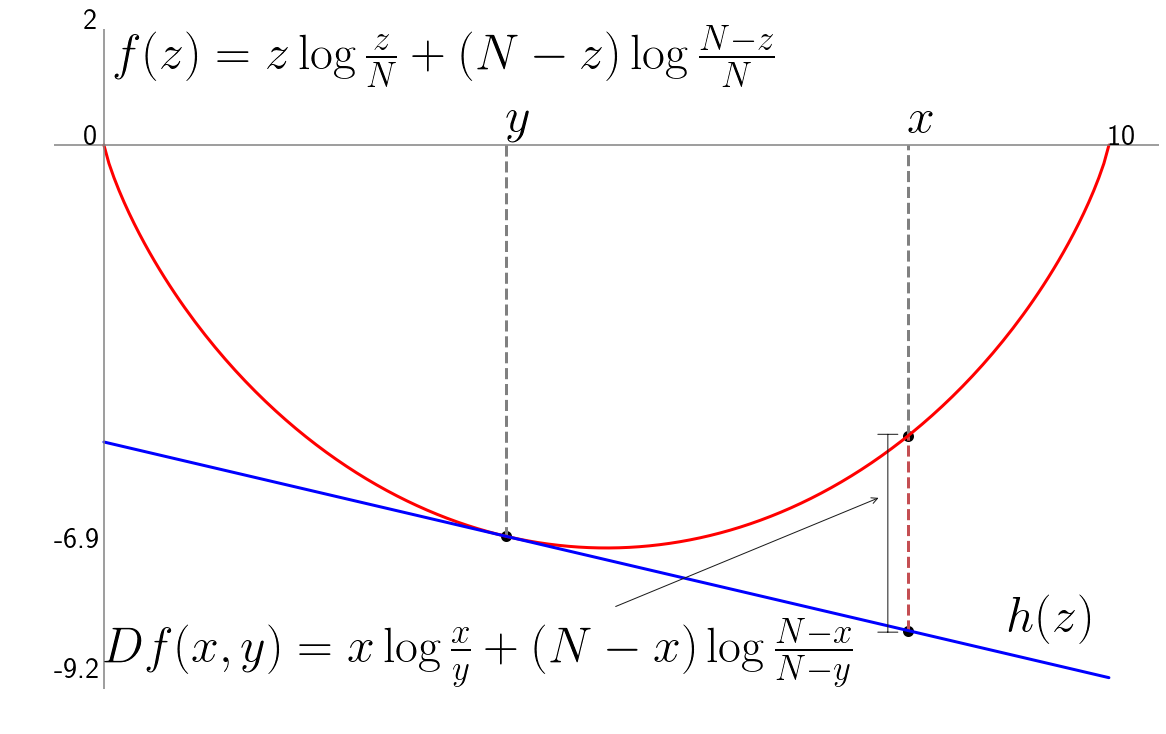

In [1409]:
def f1(x):
    return x * np.log(x / 10)  + (10-x) * np.log((10-x) / 10) 

tangent_line_binomial(f1,4,0.00001,10-0.00001,8)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


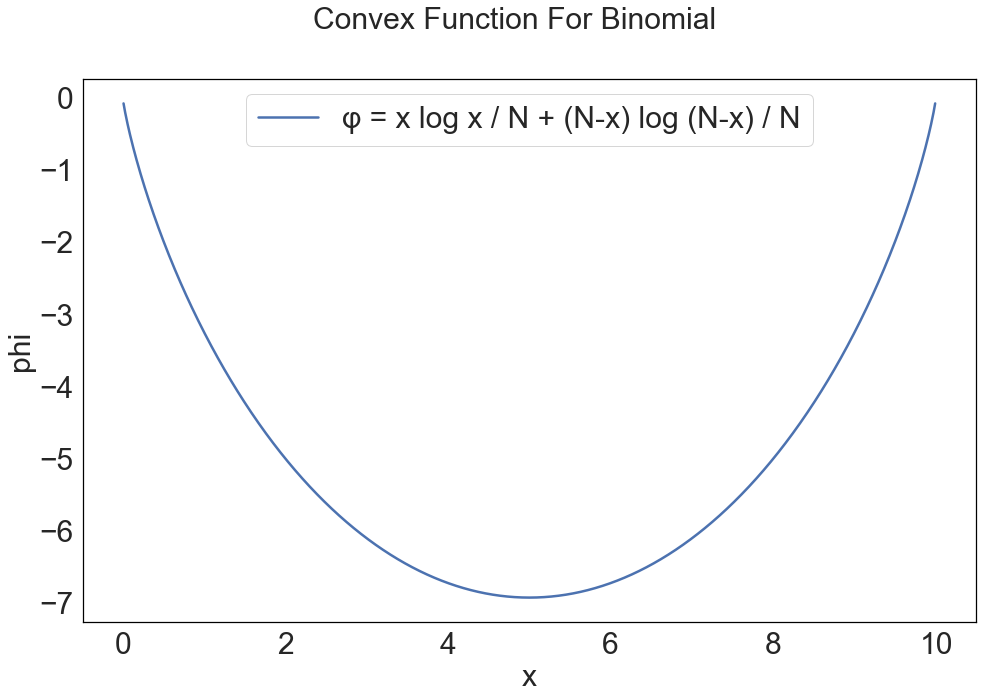

In [41]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
t1 = np.arange(0,10,0.01)
t2 = np.arange(0,10,0.01)

breg = t1 * np.log(t1 / 10)  + (10-t1) * np.log((10-t1) / 10) 

ax_1.plot(t1, breg , label="φ = x log x / N + (N-x) log (N-x) / N", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(30)

ax_1.legend(loc=0, fontsize = 30)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('x')
ax_1.set_ylabel('phi')
fig_1.suptitle('Convex Function For Binomial', fontsize = 30)
fig_1.savefig('Binomialfunction.pdf')

In [14]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import axes3d
import numpy

#desired function is for example f(x, y, {a,b,c}) = x*a/((y+b)*(y+c))
t1 = np.arange(0,10,0.01)
t2 = np.arange(0,10,0.01)
breg = (t1-t2)** 2 / 2
X, Y = numpy.meshgrid(t1, t2)
Z = (X-Y)** 2 / 2
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111, projection = '3d')

surf = ax.plot_surface(X, Y, Z, rstride = 10, cstride = 10, \
       cmap = matplotlib.cm.jet)

fig.colorbar(surf)
plt.show()

TypeError: from_bounds() argument after * must be an iterable, not int

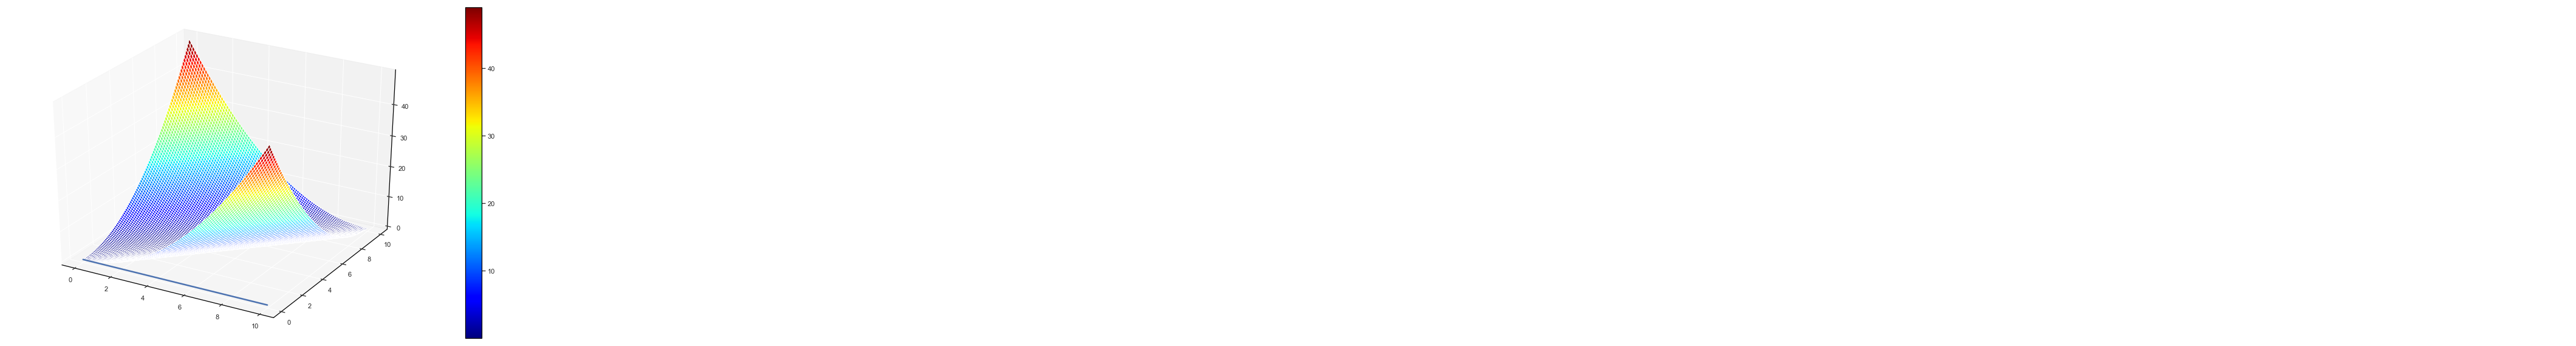

In [20]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import axes3d
import numpy

#desired function is for example f(x, y, {a,b,cb}) = x*a/((y+b)*(y+c))
t1 = np.arange(0,10,0.01)
t2 = np.arange(0,10,0.01)
breg = (t1-t2)** 2 / 2
X, Y = numpy.meshgrid(t1, t2)
Z = (X-Y)** 2 / 2
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111, projection = '3d')
ax_1.plot(t1, breg , label="φ = x^2", linewidth=2.5)

surf = ax_1.plot_surface(X, Y, Z, rstride = 10, cstride = 10, \
       cmap = matplotlib.cm.jet)

fig_1.colorbar(surf)
#fig_1.tight_layout(pad=0)
fig_1.savefig('PHIBREGMAN.pdf')



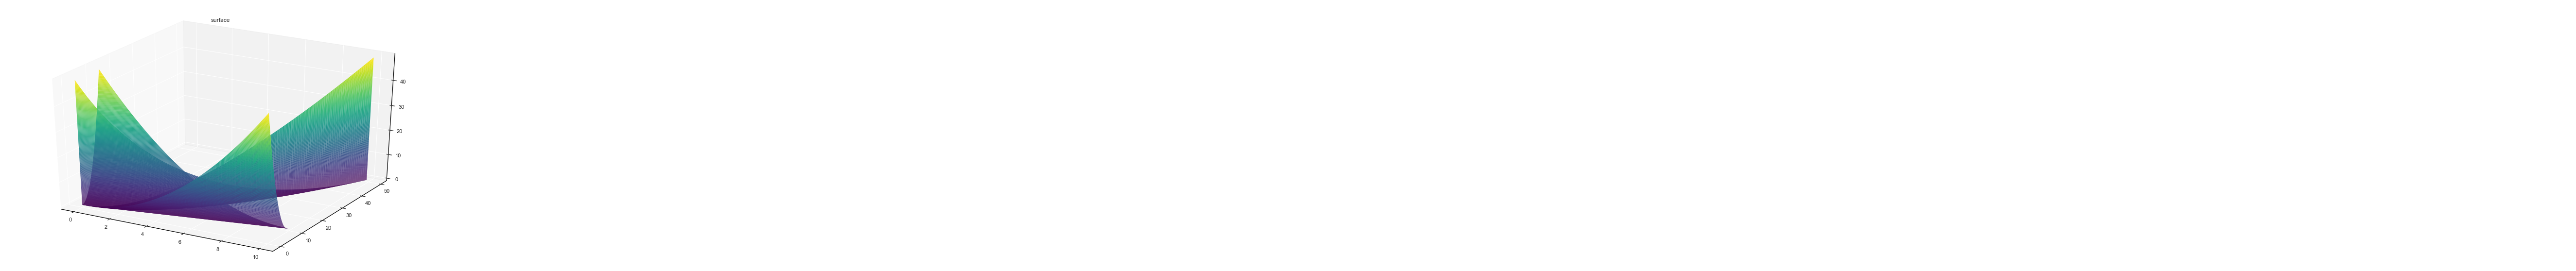

In [42]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import axes3d
import numpy

#desired function is for example f(x, y, {a,b,cb}) = x*a/((y+b)*(y+c))
t1 = np.arange(0,10,0.05)
t2 = np.arange(0,10,0.05)
breg = (t1-t2)** 2 / 2
X, Y = numpy.meshgrid(t1, t2)
Z = (X-Y)** 2 / 2
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111, projection = '3d')

ax_1 = plt.axes(projection='3d')
ax_1.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

phi = (X)** 2 / 2
ax_1.plot_surface(X, phi,Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax_1.set_title('surface')

#fig_1.tight_layout(pad=0)
fig_1.savefig('PHIBREGMAN.pdf')





